# Librerías y configuraciones

In [11]:
# Arrays para manipular datos
import numpy as np
import pandas as pd

# Gráficos
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 10)
import seaborn as sns
sns.set(style="darkgrid", font_scale=1.5)

# Ciencia de datos, machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Carga de datos

In [3]:
# https://drive.google.com/file/d/1sWLmuazrRKlb1_c88soFRqQYF0wXCxgT/view?usp=sharing
data = pd.read_csv("./wine.csv")
# data.head()

# Escalado



In [4]:
scaler = StandardScaler()
scaler.fit(data)
data_escalada = scaler.transform(data)

# Cantidad de clusters por Silhouette e Inercia.

## Silhouette vale para cualquier clusterización

## Inercia solamente para k-means (o cualquiera que use centroides prototípicos)

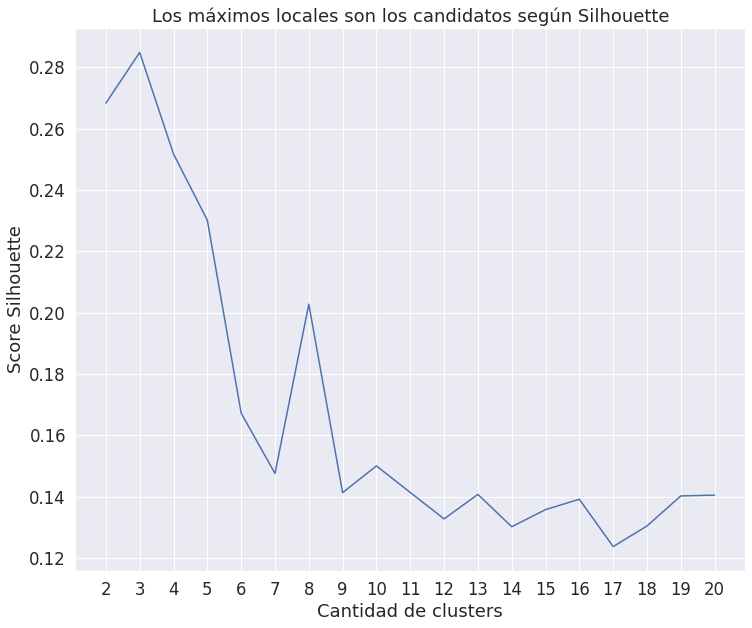

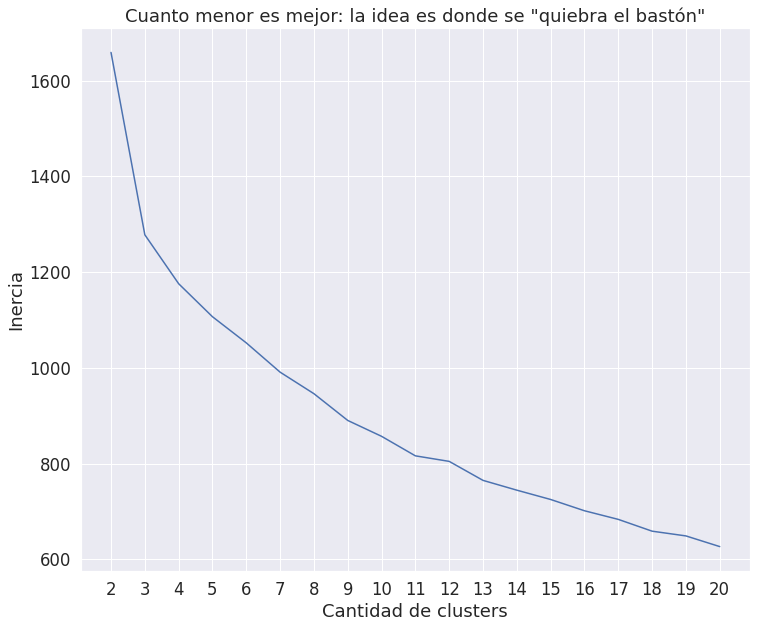

In [9]:
silhouette_scores = []
inertia_scores = []
rango_clusters = range(2,21)

for i in rango_clusters:
    # para cada valor de i, calculo kmeans y silhouette
    k_means = KMeans(n_clusters=i)
    k_means.fit(data_escalada)
    
    inertia_scores.append(k_means.inertia_)
    sil_score = silhouette_score(data_escalada, labels=k_means.labels_)
    silhouette_scores.append(sil_score)

plt.plot(rango_clusters,silhouette_scores)
plt.xticks(rango_clusters)
plt.xlabel('Cantidad de clusters')
plt.ylabel('Score Silhouette')
plt.title('Los máximos locales son los candidatos según Silhouette')
plt.show()

plt.plot(rango_clusters,inertia_scores)
plt.xticks(rango_clusters)
plt.xlabel('Cantidad de clusters')
plt.ylabel('Inercia')
plt.title('Cuanto menor es mejor: la idea es donde se "quiebra el bastón"')
plt.show()

# Clustering (agrupamiento) jerárquico aglomerativo

## linkage: forma de medir distancia entre clusters

## Distancia: la que se usa para medir esas distancias

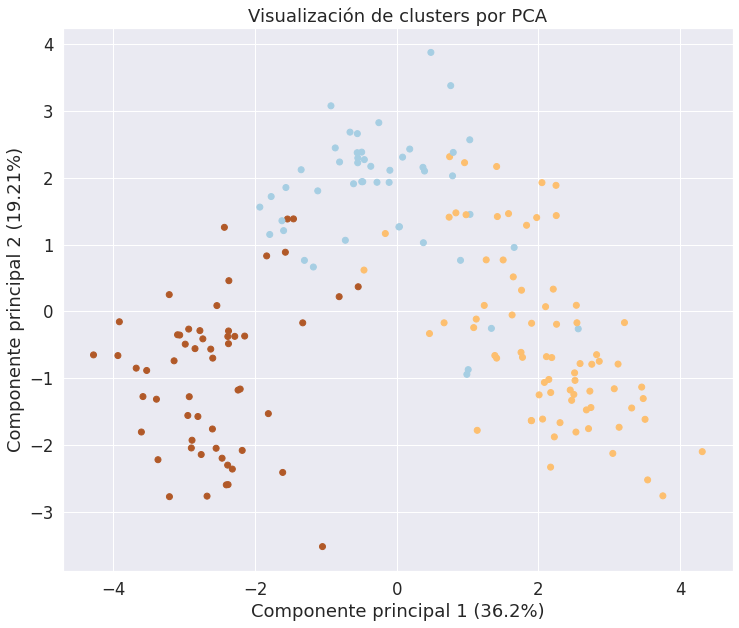

In [15]:
cant_cluster = 3

politica_agrupamiento = ['ward', 'complete', 'average', 'single']
distancia = ["cosine", "euclidean", "manhattan"]

# OJO: linkage Ward solamente va con distancia euclideana.

clustering = AgglomerativeClustering(n_clusters=cant_cluster, linkage=politica_agrupamiento[1], affinity=distancia[0])

clustering.fit(data_escalada)

y_jerarq = pd.Series(clustering.labels_)



pca = PCA(n_components=2)
# calculo PCA
pca.fit(data_escalada)
# transformo los datos originales al plano PCA
pca_data = pca.transform(data_escalada)

# cálculo varianza explicada
vars = pca.explained_variance_ratio_
var1 = round(100*vars[0],2)
var2 = round(100*vars[1],2)

# grafico en el plano PCA datos y clusters
plt.scatter(pca_data[:,0],pca_data[:,1], c=clustering.labels_, cmap="Paired")
# plt.scatter(centroides_pca[:,0],centroides_pca[:, 1], c="red", s=200)
plt.xlabel("Componente principal 1 ({}%)".format(var1))
plt.ylabel("Componente principal 2 ({}%)".format(var2))
plt.title("Visualización de clusters por PCA")
plt.show()

# Para investigar

## Otros algoritmos de clustering: https://scikit-learn.org/stable/modules/clustering.html

## Otras medidas de evaluación de la clusterización: https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation